### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

Text(0, 0.5, 'x2')

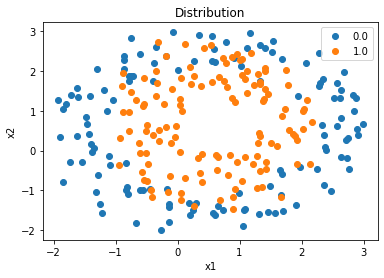

In [2]:
# Load dataset
colnames=['x1', 'x2', 'label'] 
data = pd.read_csv("q3_data.csv",header = None,names=colnames)
# Plot points
groups = data.groupby('label')
for name, group in groups:
    plt.plot(group['x1'], group['x2'], marker='o', linestyle='', label = name)

plt.legend()
plt.title('Distribution')
plt.xlabel('x1')
plt.ylabel('x2')


## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def map_feature(data):


    data_lst = []

    for index, row in data.iterrows():
        lst = []

        lst.append(1)

        lst.append(pow(row['x1'],1))
        lst.append(pow(row['x2'],1))

        lst.append(pow(row['x1'],2))
        lst.append(pow(row['x1'],1)*pow(row['x2'],1))
        lst.append(pow(row['x2'],2))

        lst.append(pow(row['x1'],3))
        lst.append(pow(row['x1'],2)*pow(row['x2'],1))
        lst.append(pow(row['x1'],1)*pow(row['x2'],2))
        lst.append(pow(row['x2'],3))

        lst.append(pow(row['x1'],4))
        lst.append(pow(row['x1'],3)*pow(row['x2'],1))
        lst.append(pow(row['x1'],2)*pow(row['x2'],2))
        lst.append(pow(row['x1'],1)*pow(row['x2'],3))
        lst.append(pow(row['x2'],4))

        lst.append(pow(row['x1'],5))
        lst.append(pow(row['x1'],4)*pow(row['x2'],1))
        lst.append(pow(row['x1'],3)*pow(row['x2'],2))
        lst.append(pow(row['x1'],2)*pow(row['x2'],3))
        lst.append(pow(row['x1'],1)*pow(row['x2'],4))
        lst.append(pow(row['x2'],5))

        lst.append(pow(row['x1'],6))
        lst.append(pow(row['x1'],5)*pow(row['x2'],1))
        lst.append(pow(row['x1'],4)*pow(row['x2'],2))
        lst.append(pow(row['x1'],3)*pow(row['x2'],3))
        lst.append(pow(row['x1'],2)*pow(row['x2'],4))
        lst.append(pow(row['x1'],1)*pow(row['x2'],5))
        lst.append(pow(row['x2'],6))

        data_lst.append(lst)
    data_arr = np.asarray(data_lst)
    return data_arr

In [4]:
aug_data = map_feature(data)
aug_data

array([[1.00000000e+00, 2.64038210e+00, 8.07779893e-01, ...,
        2.96828579e+00, 9.08096439e-01, 2.77816626e-01],
       [1.00000000e+00, 2.56905026e+00, 6.20770385e-01, ...,
        9.80097229e-01, 2.36825002e-01, 5.72250182e-02],
       [1.00000000e+00, 2.84233567e+00, 9.98557095e-01, ...,
        8.03234468e+00, 2.82188865e+00, 9.91373737e-01],
       ...,
       [1.00000000e+00, 1.32044480e+00, 4.47410744e-01, ...,
        6.98660414e-02, 2.36729453e-02, 8.02118351e-03],
       [1.00000000e+00, 2.08072860e+00, 1.28163360e+00, ...,
        1.16811717e+01, 7.19506719e+00, 4.43183213e+00],
       [1.00000000e+00, 1.50957480e+00, 1.83678673e-01, ...,
        2.59384612e-03, 3.15608218e-04, 3.84018723e-05]])

## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

In [5]:
# Define your functions here
def sigmoid(x):
 
    transform = 1/(1+math.e**(-x))

    return transform

def calculate_gradients(theta,X,Y,lamda):
    
    Y = Y.to_numpy().reshape(252,1)
    
    gradients = X.T.dot(sigmoid(X.dot(theta)) - Y)
    bias_term = gradients[0].reshape(1,1)

    weights_term = gradients[1:] + lamda * theta[1:]
    

    gradients = np.concatenate((bias_term, weights_term))

    return gradients

def update_weights(prev_weights, current_grads, learning_rate):
 
    update_weight = prev_weights - learning_rate * current_grads

    return update_weight

def logistic_regpression_regularized(X, Y, weights, learning_rate = 0.0005, num_steps = 50000,lamda = 1):
 
    weights = np.zeros(28).reshape(28,1)
#     print("Initial weight:",weights)
#     X = np.c_[np.ones((len(X), 1)), X]
    m = len(X)
    for i in range(num_steps):

        gradients = 1/m * calculate_gradients(weights,X,Y,lamda)

        weights = weights - learning_rate * gradients

    return weights

def predict(theta,X):
 
#     X = np.c_[np.ones((len(X), 1)), X]
    y_pred = sigmoid(X.dot(theta))
    
    return y_pred


In [6]:
# Define your functions here
labels = data['label']
weights = logistic_regpression_regularized(aug_data,labels,weights = [0,0],learning_rate = 0.0005,num_steps = 50000, lamda = 1)

pred = predict(weights,aug_data)

# print(weights)
# Plot decision boundary


In [7]:
pred = predict(weights,aug_data)
pred_df = pd.DataFrame(pred,columns = ['prob'])
pred_df['pred_class'] = np.where(pred_df['prob'] <= 0.5, 0, 1)
count_correct = 0
total_count = len(aug_data)
pred_df['ground_truth'] = labels
for index, row in pred_df.iterrows():
    if row.pred_class == row.ground_truth:
        count_correct += 1
accuracy = count_correct/total_count
print('Model Accuracy:',accuracy)


Model Accuracy: 0.873015873015873


<ipython-input-5-eeb06f24fd2f>:4: RuntimeWarning: overflow encountered in power
  transform = 1/(1+math.e**(-x))


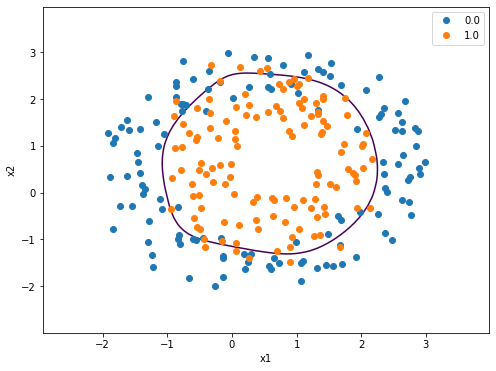

In [8]:
def plot_bounds(data , weights):
    x_q3 = data[['x1','x2']].to_numpy()
    y_q3 = data['label'].to_numpy()

    # create a mesh to plot in
    x1_min, x1_max = x_q3[:, 0].min() - 1, x_q3[:, 0].max() + 1
    x2_min, x2_max = x_q3[:, 1].min() - 1, x_q3[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                         np.linspace(x2_min, x2_max, 100))

    xx_flatten = xx.reshape(xx.shape[0]*xx.shape[1],1)
    yy_flatten = yy.reshape(yy.shape[0]*yy.shape[1],1)
    new_df = pd.DataFrame(xx_flatten, columns = ['x1'])
    new_df['x2'] = yy_flatten
    new_data = map_feature(new_df)

    new_pred = predict(weights,new_data)
    new_pred = new_pred.reshape(xx.shape)

    # Load dataset
    colnames=['x1', 'x2', 'label'] 
#     data = pd.read_csv("q3_data.csv",header = None,names=colnames)
    # Plot points
    groups = data.groupby('label')
    plt.figure(figsize=(8, 6))
    for name, group in groups:
        plt.plot(group['x1'], group['x2'], marker='o', linestyle='', label = name)

    plt.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.contour(xx, yy, new_pred, levels = [0.5])
    return

plot_bounds(data , weights)

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100, 10000]$
- draw the decision boundaries


<ipython-input-5-eeb06f24fd2f>:4: RuntimeWarning: overflow encountered in power
  transform = 1/(1+math.e**(-x))


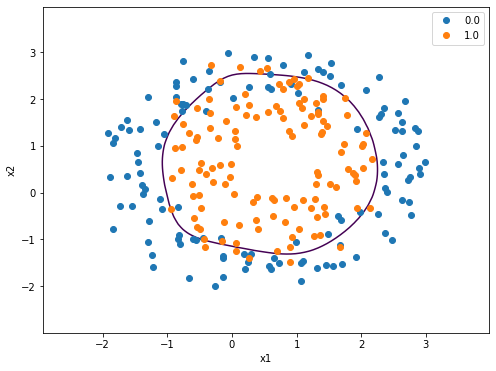

<ipython-input-5-eeb06f24fd2f>:4: RuntimeWarning: overflow encountered in power
  transform = 1/(1+math.e**(-x))


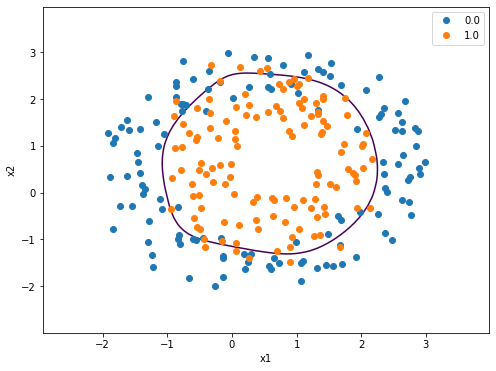

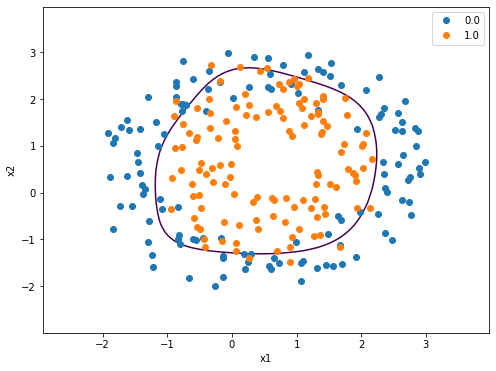

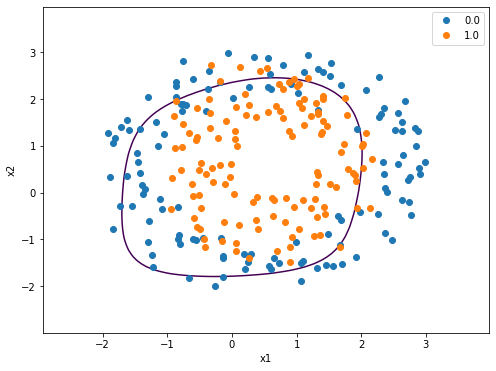

In [9]:
# lambda = 0
weights = logistic_regpression_regularized(aug_data,labels,weights = [0,0],learning_rate = 0.0005,num_steps = 50000, lamda = 0)
plot_bounds(data , weights)
plt.show()
# lambda = 1
weights = logistic_regpression_regularized(aug_data,labels,weights = [0,0],learning_rate = 0.0005,num_steps = 50000, lamda = 1)
plot_bounds(data , weights)
plt.show()
# lambda = 100
weights = logistic_regpression_regularized(aug_data,labels,weights = [0,0],learning_rate = 0.0005,num_steps = 50000, lamda = 100)
plot_bounds(data , weights)
plt.show()
# lambda = 10000
weights = logistic_regpression_regularized(aug_data,labels,weights = [0,0],learning_rate = 0.0005,num_steps = 50000, lamda = 10000)
plot_bounds(data , weights)
plt.show()

Answer for part (d) here: 
As lambda grows larger, more coefficents are pushed towards zero and the model becomes more simple and relaxed. As shown in the graphs above, the larger lambda is, the larger the decision boundary and the model's performance on training set lowers. This is because larger lambda means a more simple model, which results in the model underfitting. Lambda is a hyper parameter that has to be found through trial and error or cross validation. 
With a quick observation, the best model is when lambda = 1, because it has the highest accuarcy.
 